# Project title: Identifying Key Stressors Affecting University Students' Mental Health

Mental health impacts how we think, feel, and act daily. It determines our ability to cope with stress, build relationships, and make decisions. When neglected, mental health issues can lead to depression, anxiety, and a lower quality of life.

#1. Data processing


##1.1 Import liberies

In [119]:
import pandas as pd
import numpy as np
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.pyplot as plt
from scipy.stats import kruskal
from scipy.stats import mannwhitneyu
import seaborn as sns
from statsmodels.miscmodels.ordinal_model import OrderedModel

##1.2 Where is data come from and what are they contained?


In [2]:
google_sheet_id = '1i2cOB_dR6F9OJ-kyOKkYWeWG-Q4CpIieS820veLseW8'
url = 'https://docs.google.com/spreadsheets/d/' + google_sheet_id + '/export?format=xlsx'
mental_data = pd.read_excel(url, sheet_name='MentalHealthSurvey')


In [3]:
#Display 10 row data
mental_data.head(10)

,gender,age,university,degree_level,degree_major,academic_year,cgpa,residential_status,campus_discrimination,sports_engagement,...,study_satisfaction,academic_workload,academic_pressure,financial_concerns,social_relationships,depression,anxiety,isolation,future_insecurity,stress_relief_activities
0,Male,20,PU,Undergraduate,Data Science,2nd year,3.0-3.5,Off-Campus,No,No Sports,...,5,4,5,4,3,2,1,1,2,"Religious Activities, Social Connections, Onli..."
1,Male,20,UET,Postgraduate,Computer Science,3rd year,3.0-3.5,Off-Campus,No,1-3 times,...,5,4,4,1,3,3,3,3,4,Online Entertainment
2,Male,20,FAST,Undergraduate,Computer Science,3rd year,2.5-3.0,Off-Campus,No,1-3 times,...,5,5,5,3,4,2,3,3,1,"Religious Activities, Sports and Fitness, Onli..."
3,Male,20,UET,Undergraduate,Computer Science,3rd year,2.5-3.0,On-Campus,No,No Sports,...,3,5,4,4,1,5,5,5,3,Online Entertainment
4,Female,20,UET,Undergraduate,Computer Science,3rd year,3.0-3.5,Off-Campus,Yes,No Sports,...,3,5,5,2,3,5,5,4,4,Online Entertainment
5,Female,20,UET,Undergraduate,Computer Science,3rd year,3.0-3.5,Off-Campus,No,No Sports,...,4,5,5,3,3,5,5,5,5,"Religious Activities, Social Connections, Onli..."
6,Male,26,PU,Postgraduate,Data Science,1st year,2.5-3.0,On-Campus,Yes,1-3 times,...,4,4,4,5,2,5,4,4,5,"Social Connections, Online Entertainment"
7,Male,22,PU,Undergraduate,Data Science,2nd year,3.0-3.5,Off-Campus,Yes,No Sports,...,3,4,4,5,4,3,2,2,4,"Religious Activities, Social Connections, Onli..."
8,Male,20,COMSATS,Undergraduate,Computer Science,3rd year,2.5-3.0,Off-Campus,Yes,1-3 times,...,3,4,3,4,2,3,4,3,5,"Religious Activities, Social Connections, Onli..."
9,Male,23,COMSATS,Undergraduate,Computer Science,3rd year,2.5-3.0,Off-Campus,No,No Sports,...,3,5,3,5,1,5,5,5,5,Sports and Fitness


In [4]:
#Data shape and information
print(f"There are {mental_data.shape[1]} columns and {mental_data.shape[0]} rows in the train dataset.")

mental_data.info()


There are 21 columns and 87 rows in the train dataset.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87 entries, 0 to 86
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   gender                    87 non-null     object
 1   age                       87 non-null     int64 
 2   university                87 non-null     object
 3   degree_level              87 non-null     object
 4   degree_major              87 non-null     object
 5   academic_year             87 non-null     object
 6   cgpa                      87 non-null     object
 7   residential_status        87 non-null     object
 8   campus_discrimination     87 non-null     object
 9   sports_engagement         87 non-null     object
 10  average_sleep             87 non-null     object
 11  study_satisfaction        87 non-null     int64 
 12  academic_workload         87 non-null     int64 
 13  academic_pressure         8

In [5]:
#Check Duplicate data and missing(null) values
print("There are {} duplicates in the dataset.".format(mental_data.duplicated().sum()))

print("Checking for missing values in each column:")
print(mental_data.isnull().sum())


There are 0 duplicates in the dataset.
Checking for missing values in each column:
gender                      0
age                         0
university                  0
degree_level                0
degree_major                0
academic_year               0
cgpa                        0
residential_status          0
campus_discrimination       0
sports_engagement           0
average_sleep               0
study_satisfaction          0
academic_workload           0
academic_pressure           0
financial_concerns          0
social_relationships        0
depression                  0
anxiety                     0
isolation                   0
future_insecurity           0
stress_relief_activities    0
dtype: int64


In [6]:
#Check uinique values in each column
for column in mental_data:
    num_unique = mental_data[column].nunique()
    print(f"'{column}' has {num_unique} unique categories.")

'gender' has 2 unique categories.
'age' has 8 unique categories.
'university' has 9 unique categories.
'degree_level' has 2 unique categories.
'degree_major' has 4 unique categories.
'academic_year' has 4 unique categories.
'cgpa' has 6 unique categories.
'residential_status' has 2 unique categories.
'campus_discrimination' has 2 unique categories.
'sports_engagement' has 4 unique categories.
'average_sleep' has 3 unique categories.
'study_satisfaction' has 5 unique categories.
'academic_workload' has 4 unique categories.
'academic_pressure' has 5 unique categories.
'financial_concerns' has 5 unique categories.
'social_relationships' has 5 unique categories.
'depression' has 5 unique categories.
'anxiety' has 5 unique categories.
'isolation' has 5 unique categories.
'future_insecurity' has 5 unique categories.
'stress_relief_activities' has 38 unique categories.


##1.3 What do we have for data overview?

Data will come up with ...

In [99]:
# Define the key columns
key_columns in ['academic_workload', 'academic_pressure','financial_concerns','anxiety', 'isolation', 'future_insecurity']

# Select categorical and numerical columns (initial)
categorical_columns = mental_data.select_dtypes(include=['object']).columns
numerical_columns = mental_data.select_dtypes(exclude=['object']).columns

# Print out column information
print("Target Column:", key_columns)
print("\nCategorical Columns:", categorical_columns.tolist())
print("\nNumerical Columns:", numerical_columns.tolist())

Target Column: ['academic_pressure', 'financial_concerns', 'depression', 'anxiety', 'isolation']

Categorical Columns: ['gender', 'university', 'degree_level', 'degree_major', 'academic_year', 'cgpa', 'residential_status', 'campus_discrimination', 'sports_engagement', 'average_sleep', 'stress_relief_activities']

Numerical Columns: ['age', 'study_satisfaction', 'academic_workload', 'academic_pressure', 'financial_concerns', 'social_relationships', 'depression', 'anxiety', 'isolation', 'future_insecurity', 'stress_relief_activity_count']


What will show for each categorical column?

In [100]:
# Get the unique values for each categorical column
for col in categorical_columns:
    print(f"Column: {col}")
    print(f"Unique Values: {mental_data[col].unique()}")
    print("\n")

Column: gender
Unique Values: ['Male' 'Female']


Column: university
Unique Values: ['PU' 'UET' 'FAST' 'COMSATS' 'NUST' 'VU' 'UMT' 'UOL' 'KUST']


Column: degree_level
Unique Values: ['Undergraduate' 'Postgraduate']


Column: degree_major
Unique Values: ['Data Science' 'Computer Science' 'Software Engineering'
 'Information Technology']


Column: academic_year
Unique Values: ['2nd year' '3rd year' '1st year' '4th year']


Column: cgpa
Unique Values: ['3.0-3.5' '2.5-3.0' '3.5-4.0' '1.5-2.0' '2.0-2.5' '0.0-0.0']


Column: residential_status
Unique Values: ['Off-Campus' 'On-Campus']


Column: campus_discrimination
Unique Values: ['No' 'Yes']


Column: sports_engagement
Unique Values: ['No Sports' '1-3 times' '7+ times' '4-6 times']


Column: average_sleep
Unique Values: ['4-6 hrs' '2-4 hrs' '7-8 hrs']


Column: stress_relief_activities
Unique Values: ['Religious Activities, Social Connections, Online Entertainment'
 'Online Entertainment'
 'Religious Activities, Sports and Fitness, Online

... and numerical colums?

There’s a change here: the column [stress_relief_activity_count] will now reflect the number of stress relief activities the student has participated in

In [101]:
#mental_data['stress_relief_activity_count'] = mental_data['stress_relief_activities'].apply(lambda x: len(x.split(',')))
mental_data.head()

,gender,age,university,degree_level,degree_major,academic_year,cgpa,residential_status,campus_discrimination,sports_engagement,...,academic_workload,academic_pressure,financial_concerns,social_relationships,depression,anxiety,isolation,future_insecurity,stress_relief_activities,stress_relief_activity_count
0,Male,20,PU,Undergraduate,Data Science,2nd year,3.0-3.5,Off-Campus,No,No Sports,...,4,5,4,3,2,1,1,2,"Religious Activities, Social Connections, Onli...",3
1,Male,20,UET,Postgraduate,Computer Science,3rd year,3.0-3.5,Off-Campus,No,1-3 times,...,4,4,1,3,3,3,3,4,Online Entertainment,1
2,Male,20,FAST,Undergraduate,Computer Science,3rd year,2.5-3.0,Off-Campus,No,1-3 times,...,5,5,3,4,2,3,3,1,"Religious Activities, Sports and Fitness, Onli...",3
3,Male,20,UET,Undergraduate,Computer Science,3rd year,2.5-3.0,On-Campus,No,No Sports,...,5,4,4,1,5,5,5,3,Online Entertainment,1
4,Female,20,UET,Undergraduate,Computer Science,3rd year,3.0-3.5,Off-Campus,Yes,No Sports,...,5,5,2,3,5,5,4,4,Online Entertainment,1


In [ ]:
#Add new numerical columns
numerical_columns.append('stress_relief_activity_count')

In [102]:
# Get the unique values for each numerical column

# Assumsion scale 1-5
value_labels = {
      1: '1-Very Low',    # Very Low
      2: '2',             # Low
      3: '3',             # Moderate
      4: '4',             # High
      5: '5-Very High'    # Very High
}

for col in numerical_columns:
    print(f"Column: {col}")

    unique_values = sorted(mental_data[col].unique().tolist())

    if col not in ['age', 'stress_relief_activity_count']:
        labeled_values = [value_labels.get(val, str(val)) for val in unique_values]
    else:
        labeled_values = unique_values
    print(f"Unique Values: {labeled_values}")
    print("\n")

Column: age
Unique Values: [17, 18, 19, 20, 21, 22, 23, 26]


Column: study_satisfaction
Unique Values: ['1-Very Low', '2', '3', '4', '5-Very High']


Column: academic_workload
Unique Values: ['2', '3', '4', '5-Very High']


Column: academic_pressure
Unique Values: ['1-Very Low', '2', '3', '4', '5-Very High']


Column: financial_concerns
Unique Values: ['1-Very Low', '2', '3', '4', '5-Very High']


Column: social_relationships
Unique Values: ['1-Very Low', '2', '3', '4', '5-Very High']


Column: depression
Unique Values: ['1-Very Low', '2', '3', '4', '5-Very High']


Column: anxiety
Unique Values: ['1-Very Low', '2', '3', '4', '5-Very High']


Column: isolation
Unique Values: ['1-Very Low', '2', '3', '4', '5-Very High']


Column: future_insecurity
Unique Values: ['1-Very Low', '2', '3', '4', '5-Very High']


Column: stress_relief_activity_count
Unique Values: [1, 2, 3, 4, 5, 6]




What do we have here?

In [103]:
# Display descriptive statistics for numerical columns
mental_data.describe()

,age,study_satisfaction,academic_workload,academic_pressure,financial_concerns,social_relationships,depression,anxiety,isolation,future_insecurity,stress_relief_activity_count
count,87.000000,87.000000,87.000000,87.000000,87.000000,87.000000,87.000000,87.000000,87.000000,87.000000,87.000000
mean,19.942529,3.931034,3.885057,3.781609,3.390805,2.781609,3.218391,3.218391,3.241379,3.011494,2.137931
std,1.623636,1.043174,0.854880,1.125035,1.400634,1.175578,1.367609,1.297809,1.405682,1.385089,1.313370
min,17.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,19.000000,3.000000,3.000000,3.000000,2.500000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000
50%,20.000000,4.000000,4.000000,4.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,2.000000
75%,21.000000,5.000000,4.500000,5.000000,5.000000,4.000000,4.000000,4.000000,4.500000,4.000000,3.000000
max,26.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,6.000000


Let's do quick view for factor group.

In [104]:
# Display descriptive statistics for factor group
desc = mental_data.describe()

scale_1_5_cols = ['academic_workload', 'academic_pressure', 'financial_concerns',
                  'social_relationships', 'depression', 'anxiety', 'isolation',
                  'future_insecurity']

filtered = desc[scale_1_5_cols]

def highlight_max_min(s):
    is_max = s == s.max()
    is_min = s == s.min()
    return ['color: green' if v else 'color: red' if m else ''
            for v, m in zip(is_max, is_min)]

highlight = filtered.style.apply(highlight_max_min, axis=1)

highlight

,academic_workload,academic_pressure,financial_concerns,social_relationships,depression,anxiety,isolation,future_insecurity
count,87.000000,87.000000,87.000000,87.000000,87.000000,87.000000,87.000000,87.000000
mean,3.885057,3.781609,3.390805,2.781609,3.218391,3.218391,3.241379,3.011494
std,0.854880,1.125035,1.400634,1.175578,1.367609,1.297809,1.405682,1.385089
min,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,3.000000,3.000000,2.500000,2.000000,2.000000,2.000000,2.000000,2.000000
50%,4.000000,4.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
75%,4.500000,5.000000,5.000000,4.000000,4.000000,4.000000,4.500000,4.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


#2. Exploratory Data Analysis - EDA

##2.1 Demographics: Who are the students in this study?

<ipython-input-58-7a8501053fcd>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=mental_data, x='gender', palette="husl")


Text(0, 0.5, 'No of gender')

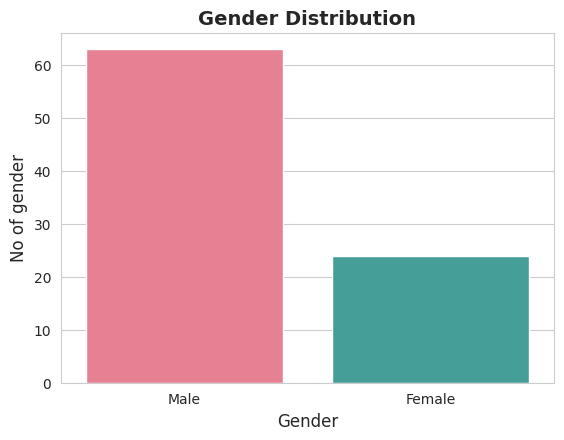

In [58]:
# 1. Gender Distribution
plt.figure(figsize=(14, 10))
plt.subplot(2, 2, 2)
sns.countplot(data=mental_data, x='gender', palette="husl")
plt.title("Gender Distribution", fontsize=14, fontweight='bold')
plt.xlabel("Gender", fontsize=12)
plt.ylabel("No of gender", fontsize=12)


Text(0, 0.5, 'No of student')

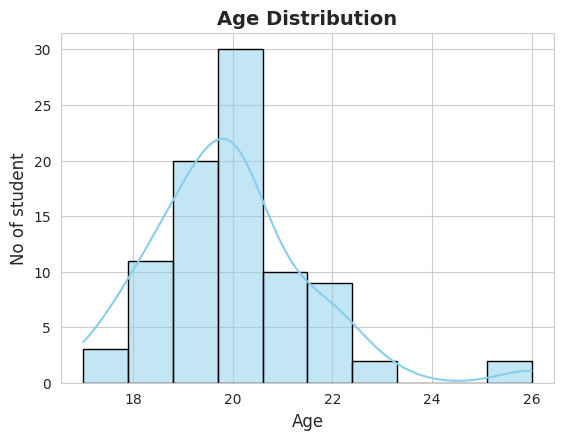

In [57]:
# 2. Age Distribution
plt.figure(figsize=(14, 10))
plt.subplot(2, 2, 2)
sns.histplot(data=mental_data, x='age', kde=True, bins=10, color="skyblue", edgecolor="black")
plt.title("Age Distribution", fontsize=14, fontweight='bold')
plt.xlabel("Age", fontsize=12)
plt.ylabel("No of student", fontsize=12)

Text(0, 0.5, '')

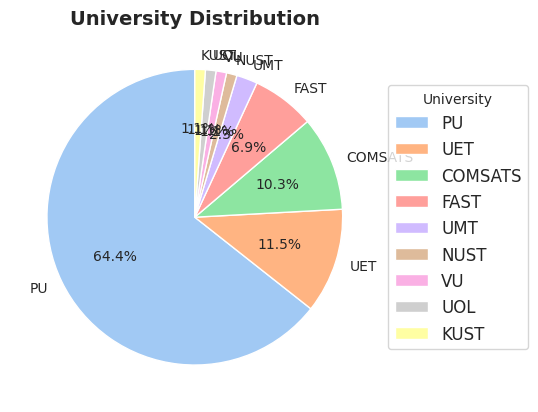

In [66]:
# 3. University Distribution
mental_data['university'].value_counts().plot.pie(autopct='%1.1f%%', colors=sns.color_palette("pastel"), startangle=90)
plt.legend(
    university_counts.index,
    title="University",
    loc="center left",
    bbox_to_anchor=(1, 0, 0.5, 1),
    fontsize=12
)
plt.title("University Distribution", fontsize=14, fontweight='bold')
plt.ylabel('')

Text(0, 0.5, '')

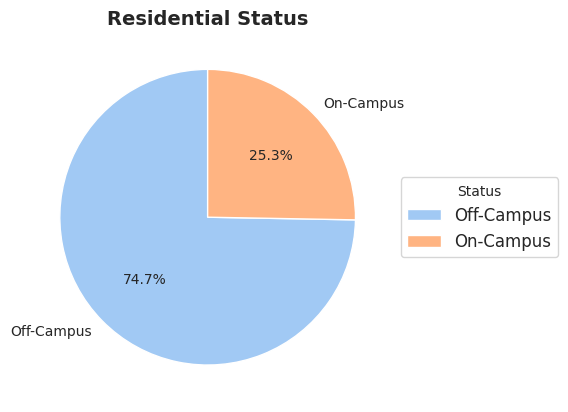

In [69]:
# 4. Residential Status
residential_status = mental_data['residential_status'].value_counts()
mental_data['residential_status'].value_counts().plot.pie(autopct='%1.1f%%', colors=sns.color_palette("pastel"), startangle=90)
plt.legend(
    residential_status.index,
    title="Status",
    loc="center left",
    bbox_to_anchor=(1, 0, 0.5, 1),
    fontsize=12
)
plt.title("Residential Status", fontsize=14, fontweight='bold')
plt.ylabel('')

**Comment:**
- Based on the head(10) output, the students appear to be from universities like PU, UET, FAST, and COMSATS, with ages ranging from 20 to 26 and a mix of genders (mostly male in the sample shown).
- Degree levels include undergraduate and postgraduate, suggesting a focus on university students at different stages.
- This section to summarize distributions of gender, age, and university across the entire dataset.

## 2.2 Academic Profile: What do they study, how do they study, and how do they feel about studying?

Text(0, 0.5, '')

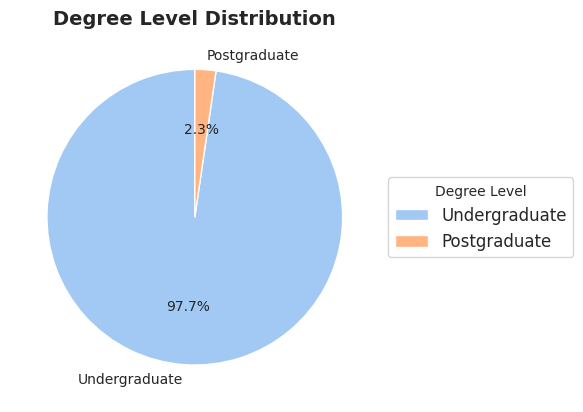

In [71]:
# 1. Degree Level
university_counts = mental_data['degree_level'].value_counts()
mental_data['degree_level'].value_counts().plot.pie(autopct='%1.1f%%', colors=sns.color_palette("pastel"), startangle=90)
plt.legend(
    university_counts.index,
    title="Degree Level",
    loc="center left",
    bbox_to_anchor=(1, 0, 0.5, 1),
    fontsize=12
)
plt.title("Degree Level Distribution", fontsize=14, fontweight='bold')
plt.ylabel('')

**Comment:**
Undergraduate (97.7%): This overwhelming majority shows that nearly all individuals in this dataset are at the undergraduate level, indicating a strong focus on early-stage higher education

<ipython-input-74-f3ff4de872de>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=mental_data, x='academic_year', palette="pastel", order=['1st year', '2nd year', '3rd year', '4th year'])


Text(0, 0.5, 'Count')

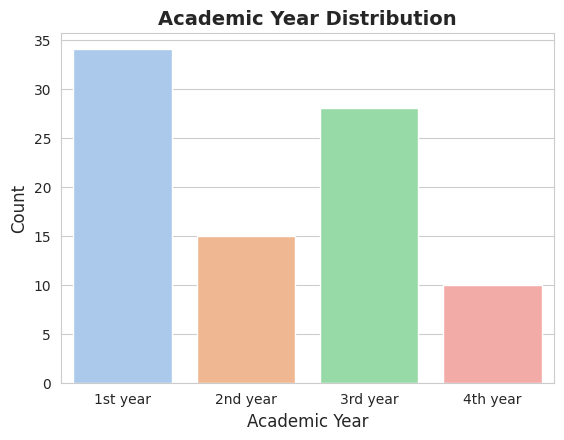

In [74]:
# 2. Academic Year
plt.figure(figsize=(14, 10))
plt.subplot(2, 2, 2)
sns.countplot(data=mental_data, x='academic_year', palette="pastel", order=['1st year', '2nd year', '3rd year', '4th year'])
plt.title("Academic Year Distribution", fontsize=14, fontweight='bold')
plt.xlabel("Academic Year", fontsize=12)
plt.ylabel("Count", fontsize=12)

**Comment:**
- 1st Year (~35 count): The largest group is in their first year, suggesting a high influx of new students in this dataset.
- 2nd Year (~15 count): A noticeable drop from the first year, indicating some attrition or a smaller cohort moving forward.
- 3rd Year (~30 count): A strong representation in the third year, showing many students are continuing their studies past the halfway mark.
- 4th Year (~10 count): The smallest group, which might reflect students graduating early, taking longer, or a smaller initial cohort reaching this stage.

<ipython-input-77-4a5e1fa66fc9>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=mental_data, x='degree_major', palette="muted", order=['Data Science', 'Computer Science', 'Information Technology', 'Software Engineering'])


Text(0, 0.5, 'Count')

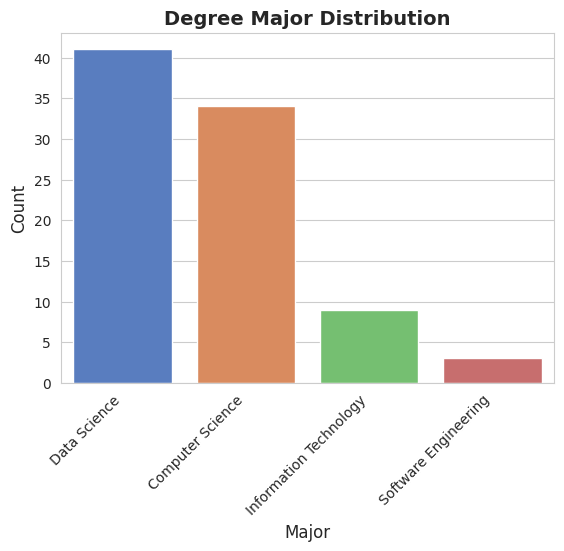

In [77]:
# 3. Degree Major
plt.figure(figsize=(14, 10))
plt.subplot(2, 2, 2)
sns.countplot(data=mental_data, x='degree_major', palette="muted", order=['Data Science', 'Computer Science', 'Information Technology', 'Software Engineering'])
plt.xticks(rotation=45, ha='right')
plt.title("Degree Major Distribution", fontsize=14, fontweight='bold')
plt.xlabel("Major", fontsize=12)
plt.ylabel("Count", fontsize=12)

**Comment**
- Data Science (~40 count): The most popular major by far, indicating a strong interest in data-driven fields among this group.
- Computer Science (~35 count): A close second, showing that traditional tech majors still hold significant appeal.

<ipython-input-80-a82c3a545895>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=mental_data, x='cgpa', palette="viridis")


Text(0.5, 0, 'CGPA')

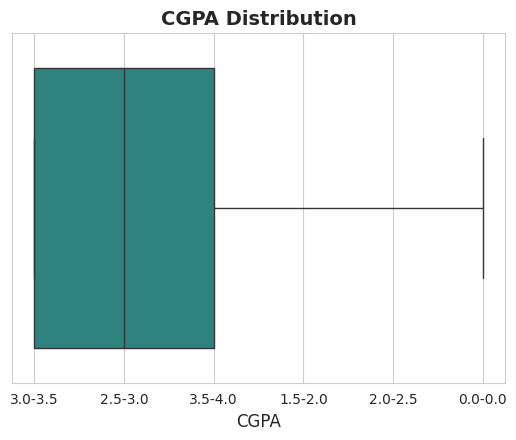

In [80]:
# 4. CGPA
plt.figure(figsize=(14, 10))
plt.subplot(2, 2, 2)
sns.boxplot(data=mental_data, x='cgpa', palette="viridis")
plt.title("CGPA Distribution", fontsize=14, fontweight='bold')
plt.xlabel("CGPA", fontsize=12)

**Comment:**
- 2.5-3.0 CGPA: The largest group, indicating that most students are performing at an average to above-average level.
- 3.0-3.5 CGPA: A significant portion, reflecting a good number of high achievers in the dataset.

Text(0, 0.5, 'Score')

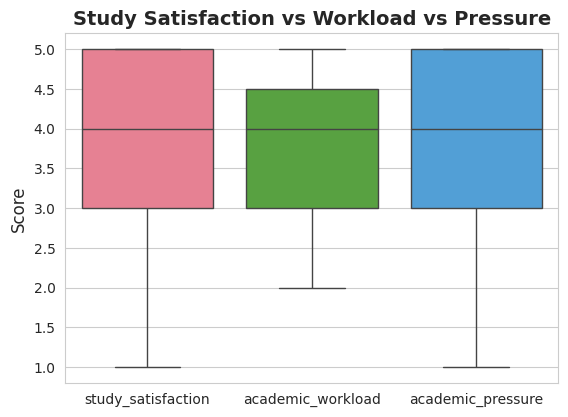

In [81]:
# 5. Academic Metrics
plt.figure(figsize=(14, 10))
plt.subplot(2, 2, 2)
sns.boxplot(data=mental_data[['study_satisfaction', 'academic_workload', 'academic_pressure']], palette="husl")
plt.title("Study Satisfaction vs Workload vs Pressure", fontsize=14, fontweight='bold')
plt.ylabel("Score", fontsize=12)

**Comment:**
- Study Satisfaction (~3.5-5.0): Students generally report high satisfaction, with most scores clustering above 4.0, indicating a positive academic experience.
- Academic Workload (~3.5-4.5): The workload is perceived as moderate to high, with a tighter range around 4.0, suggesting a consistent but manageable level of work.
- Academic Pressure (~3.0-5.0): Pressure varies more widely, with scores spanning from 3.0 to 5.0, showing that while some students feel significant stress, others handle it better.

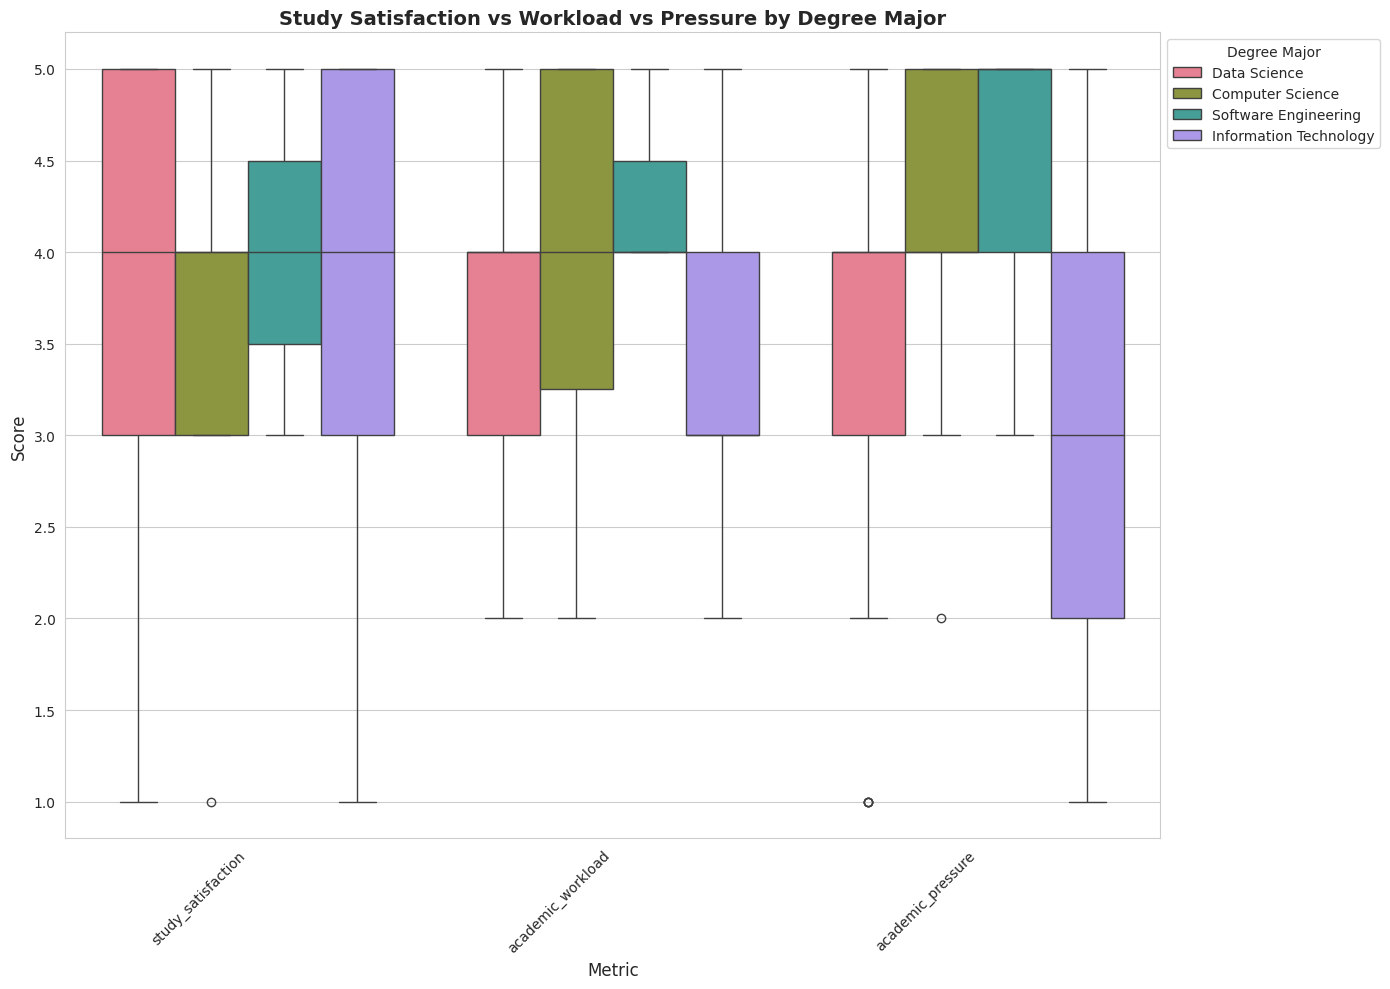

In [84]:
# 6. Metrics
plt.figure(figsize=(14, 10))

mental_data_long = mental_data.melt(
    id_vars=['degree_major'],
    value_vars=['study_satisfaction', 'academic_workload', 'academic_pressure'],
    var_name='Metric',
    value_name='Score'
)

# Boxplot với hue=degree_major
sns.boxplot(
    data=mental_data_long,
    x='Metric',
    y='Score',
    hue='degree_major',
    palette="husl"
)
plt.title("Study Satisfaction vs Workload vs Pressure by Degree Major", fontsize=14, fontweight='bold')
plt.xlabel("Metric", fontsize=12)
plt.ylabel("Score", fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend(title="Degree Major", loc="upper left", bbox_to_anchor=(1, 1))

plt.tight_layout()
plt.show()

**Comment:**
- Data Science: High satisfaction (4.5-5.0), moderate workload (4.0), and moderate pressure (3.5-4.5), showing a balanced experience.
- Computer Science: Slightly lower satisfaction (4.0-4.5), higher workload (4.5), and moderate pressure (3.5-4.5), indicating a more demanding program.
- Information Technology: High satisfaction (4.5-5.0), moderate workload (4.0), but higher pressure (4.0-5.0), suggesting stress despite satisfaction.
- Software Engineering: Moderate satisfaction (3.5-4.5), lower workload (3.5), but very high pressure (2.0-5.0), reflecting a challenging experience with wide variability.

## 2.3 Mental Health: What mental challenges are affecting them?

<ipython-input-85-8e42beacd223>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=mental_data, x='campus_discrimination', palette="pastel")


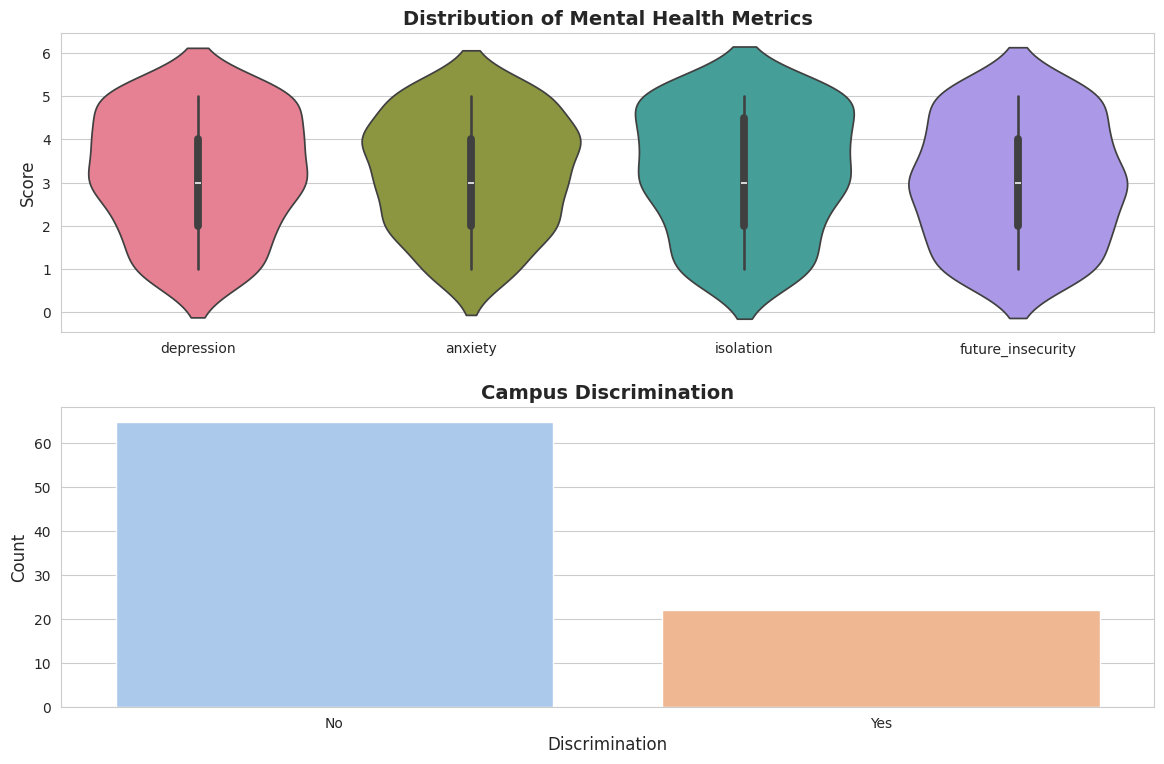

In [85]:
plt.figure(figsize=(12, 8))

# 1. Mental Health Metrics
plt.subplot(2, 1, 1)
sns.violinplot(data=mental_data[['depression', 'anxiety', 'isolation', 'future_insecurity']], palette="husl")
plt.title("Distribution of Mental Health Metrics", fontsize=14, fontweight='bold')
plt.ylabel("Score", fontsize=12)

# 2. Campus Discrimination
plt.subplot(2, 1, 2)
sns.countplot(data=mental_data, x='campus_discrimination', palette="pastel")
plt.title("Campus Discrimination", fontsize=14, fontweight='bold')
plt.xlabel("Discrimination", fontsize=12)
plt.ylabel("Count", fontsize=12)

plt.tight_layout(pad=2.0)
plt.show()

**Comment for Distribution of Mental Health Metrics:**
- Depression: Scores mostly cluster around 2-3, indicating mild to moderate depression levels among students.
- Anxiety: Similar to depression, scores center around 2-3, suggesting mild to moderate anxiety is common.
- Isolation: Scores also hover around 2-3, showing a moderate sense of isolation among the group.
- Future Insecurity: Scores range from 2-4, reflecting a slightly higher level of concern about the future compared to other metrics.

**Comment for Campus Discrimination:**
- No (65 count): The majority report no discrimination, indicating a generally inclusive campus environment.
- Yes (22 count): A smaller but notable group has experienced discrimination, highlighting an area for improvement.


## 2.4 Habits and Activities: How do they live and cope with stress?

<ipython-input-92-4ffae15d595f>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=mental_data, x='sports_engagement', palette="deep")
<ipython-input-92-4ffae15d595f>:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=activities.values, y=activities.index, palette="muted")


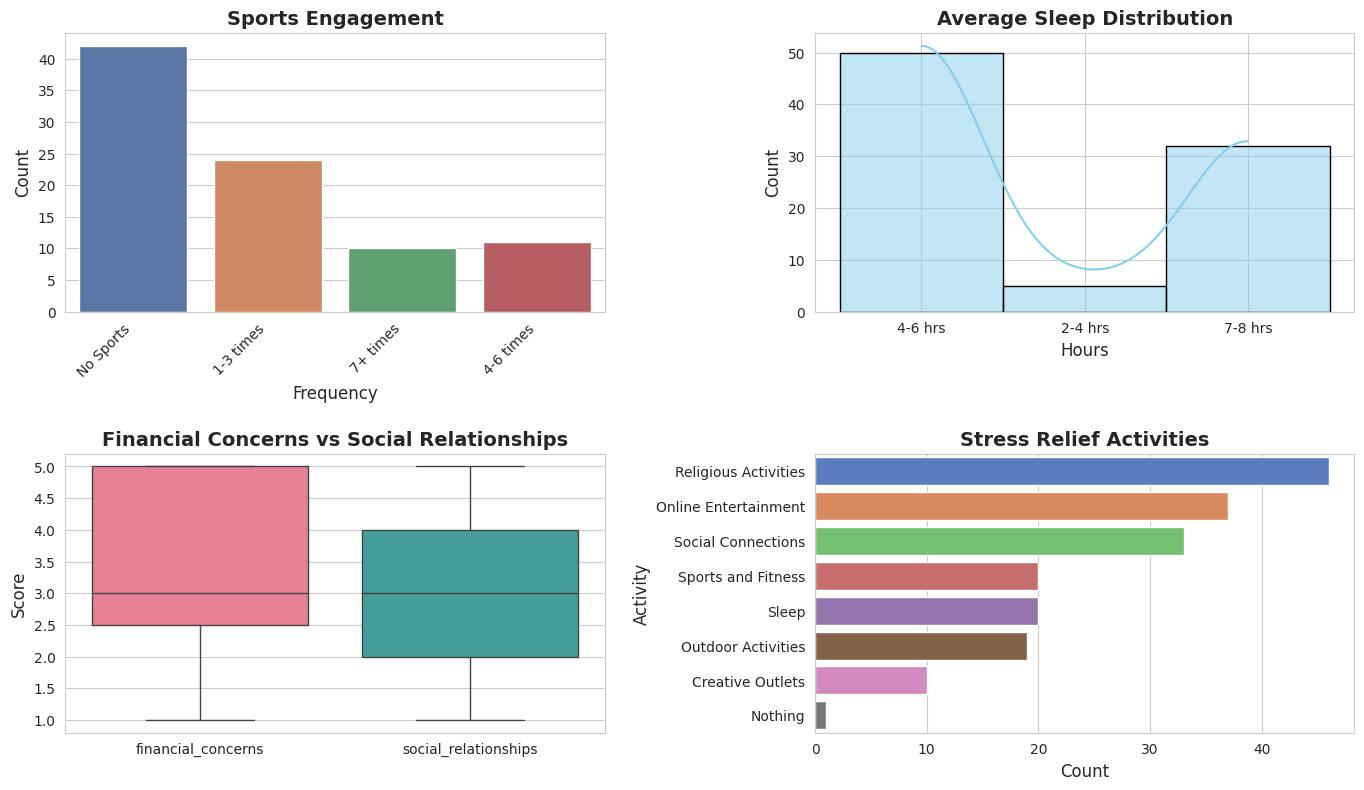

In [92]:
plt.figure(figsize=(14, 12))

# 1. Sports Engagement
plt.subplot(3, 2, 1)
sns.countplot(data=mental_data, x='sports_engagement', palette="deep")
plt.xticks(rotation=45, ha='right')
plt.title("Sports Engagement", fontsize=14, fontweight='bold')
plt.xlabel("Frequency", fontsize=12)
plt.ylabel("Count", fontsize=12)

# 2. Average Sleep
plt.subplot(3, 2, 2)
sns.histplot(data=mental_data, x='average_sleep', kde=True, bins=5, color="skyblue", edgecolor="black")
plt.title("Average Sleep Distribution", fontsize=14, fontweight='bold')
plt.xlabel("Hours", fontsize=12)
plt.ylabel("Count", fontsize=12)

# 3. Financial Concerns & Social Relationships
plt.subplot(3, 2, 3)
sns.boxplot(data=mental_data[['financial_concerns', 'social_relationships']], palette="husl")
plt.title("Financial Concerns vs Social Relationships", fontsize=14, fontweight='bold')
plt.ylabel("Score", fontsize=12)

# 4. Stress Relief Activities
activities = mental_data['stress_relief_activities'].str.split(', ').explode().value_counts()
plt.subplot(3, 2, 4)
sns.barplot(x=activities.values, y=activities.index, palette="muted")
plt.title("Stress Relief Activities", fontsize=14, fontweight='bold')
plt.xlabel("Count", fontsize=12)
plt.ylabel("Activity", fontsize=12)

plt.tight_layout(pad=2.0)
plt.show()

**Comment for Sports Engagement:**

- No Sports (42 count): Most students do not engage in sports, suggesting a preference for other activities or limited interest in athletics.
- 1-3 times (24 count): A moderate group engages in sports occasionally, indicating some interest in physical activity.
- +7 times (10 count): A smaller group is highly active in sports, showing a strong commitment to fitness.
- 4-6 times (11 count): It seems to mirror the higher 7+ times group in engagement.

**Comment for Average Sleep Distribution:**
- <4-6 hrs (50 count): Many students sleep less than 6 hours, indicating potential sleep deprivation.
- 2-4 hrs (5 count): A smaller group gets very little sleep, which could impact their health and performance.
- 7-8 hrs (32 count): A significant portion gets the recommended sleep, suggesting healthier habits for this group

**Comment for Financial Concerns vs Social Relationships:**
- Financial Concerns (3.5-5.0): High scores indicate significant financial stress among students, with most feeling moderate to high concern.
- Social Relationships (3.0-4.0): Scores are more moderate, suggesting that while social connections are generally positive, they’re not as strong as financial worries are pressing.

**Comment for Stress Relief Activities:**
- Religious Activities (~50 count): The most popular stress relief method, indicating a strong reliance on faith-based practices.
- Online Entertainment (~40 count): A close second, showing that digital media is a common way to unwind.
- Social Connections (~30 count): Many students find relief through social interactions, highlighting the importance of relationships.
- Sports and Fitness (~25 count): A notable group uses physical activity to manage stress, aligning with the sports engagement data.
- Sleep (~20 count): Some prioritize sleep for stress relief, though this is less common.
- Outdoor Activities (~15 count): A smaller group engages in outdoor activities, possibly due to time or access constraints.
- Creative Outlets (~5 count): Few students use creative activities for stress relief, suggesting it’s not a popular method.
- Nothing (~2 count): A very small group does nothing to relieve stress, which could be concerning for their well-being.

## 2.5 The relationship between stressors and mental health

### Are there differences between male and female students when it comes to facing anxiety?

Mann-Whitney p-value for anxiety by gender: 0.13931160081302124


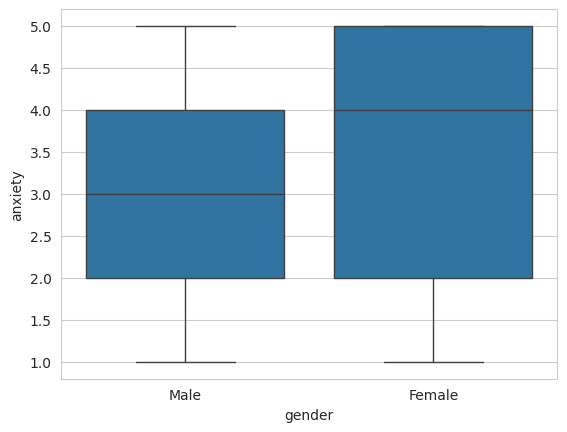

In [106]:
male_anxiety = mental_data[mental_data['gender'] == 'Male']['anxiety']
female_anxiety = mental_data[mental_data['gender'] == 'Female']['anxiety']
stat, p = mannwhitneyu(male_anxiety, female_anxiety)
print(f"Mann-Whitney p-value for anxiety by gender: {p}")
sns.boxplot(x='gender', y='anxiety', data=mental_data)
plt.show()

Comment:
* p-value: higher than 0,05 (p = 0.1393 > 0.05), it found no significant difference in anxiety levels between male and female students. The median anxiety score for males was 3.5, and for females, it was 4.0, but this difference was not statistically significant
* Gender does not appear to be a primary factor influencing anxiety in this data sample. Other factors, such as academic pressure, may play a more significant role

### Does academic pressure impact depression?

Mann-Whitney p-value for depression by academic pressure: 0.004462972127214146


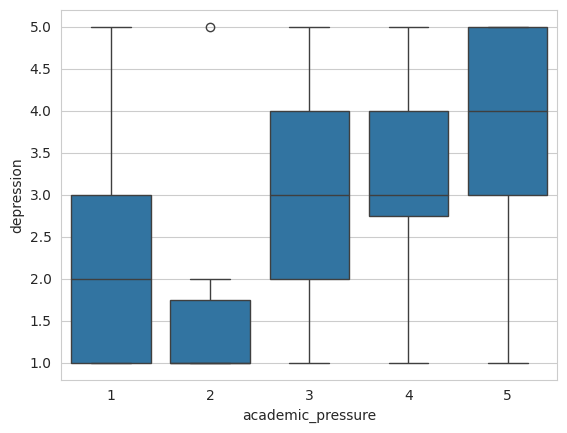

In [110]:
high_pressure = mental_data[mental_data['academic_pressure'] >= 4]['depression']
low_pressure = mental_data[mental_data['academic_pressure'] <= 3]['depression']
stat, p = mannwhitneyu(male_anxiety, female_anxiety)
print(f"Mann-Whitney p-value for depression by academic pressure: {p}")
sns.boxplot(x='academic_pressure', y='depression', data=mental_data)
plt.show()

Comment:
* p-value: smaller than 0,05, mean Academic pressure is likely to have a strong impact on the level of depression in the studied data sample
* Students experiencing high academic pressure tend to exhibit higher levels of depression compared to those with low academic pressure. This suggests that academic pressure is a significant factor negatively impacting students' mental health

### The relationship between stressors and mental health

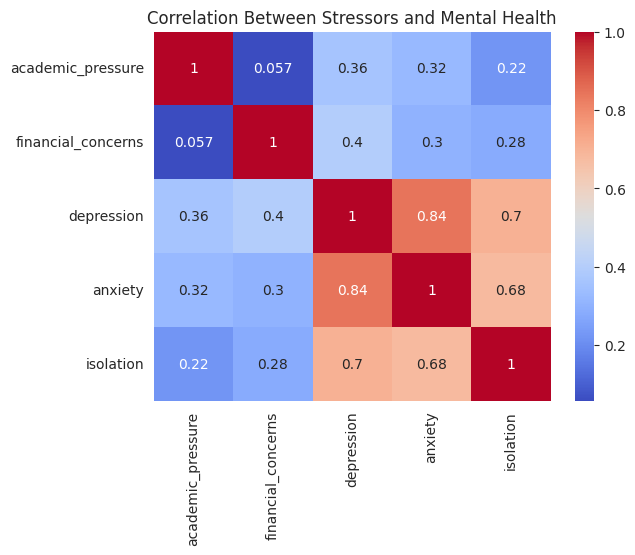

In [105]:
correlations = mental_data[key_columns].corr(method='spearman')
sns.heatmap(correlations, annot=True, cmap='coolwarm')
plt.title('Correlation Between Stressors and Mental Health')
plt.show()

Comment:
* Depression and Anxiety: The correlation coefficient is 0.84. . It suggests that individuals with depression tend to also experience high levels of anxiety, and vice versa. These two conditions are closely linked, possibly because they often co-occur in psychological disorders.
* Depression and Isolation: The correlation coefficient is 0.7. People with depression also tend to feel isolated, or feelings of isolation may exacerbate depression.
* Anxiety and Isolation: The correlation coefficient is 0.68. This shows a moderately strong positive correlation. Anxiety and feelings of isolation are also related, though the connection is not as strong as the one between depression and anxiety.

#3. Focusing on these key stressors to gain a comprehensive understanding of the factors affecting university students' mental health

### What is the relationship between categorical factors and depression/anxiety?

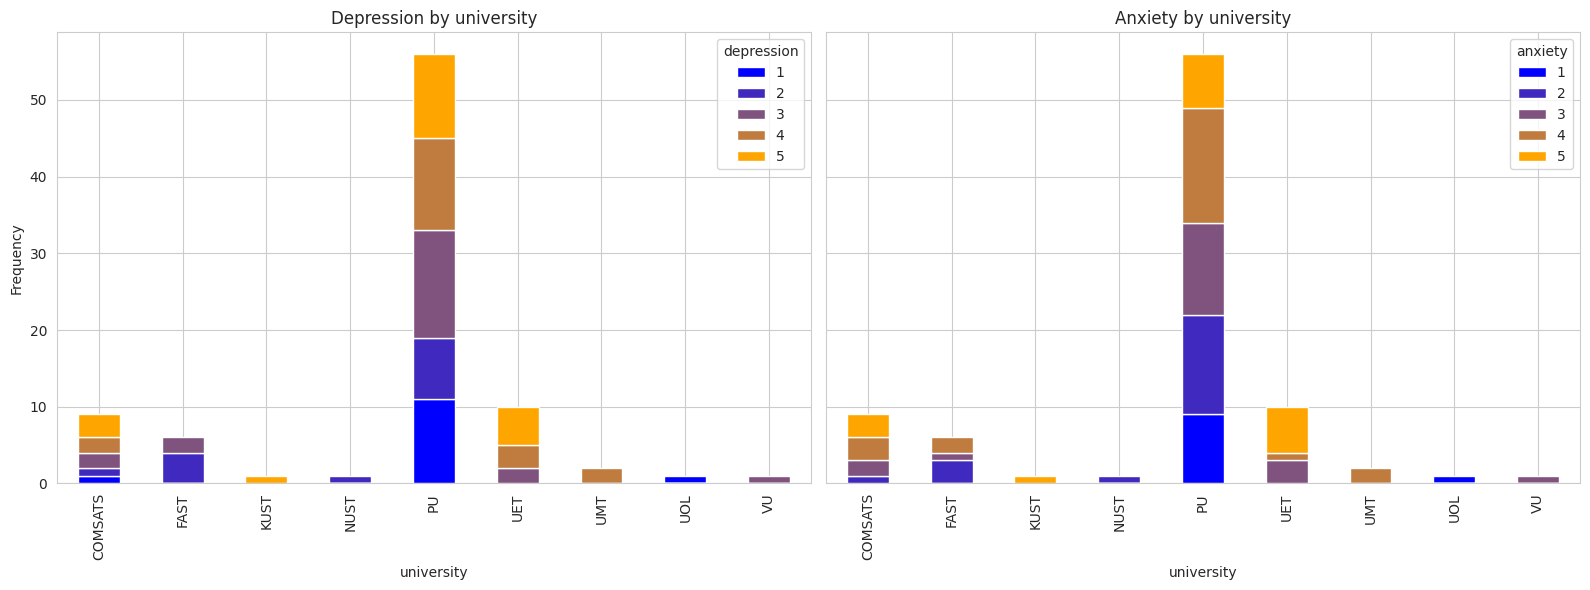

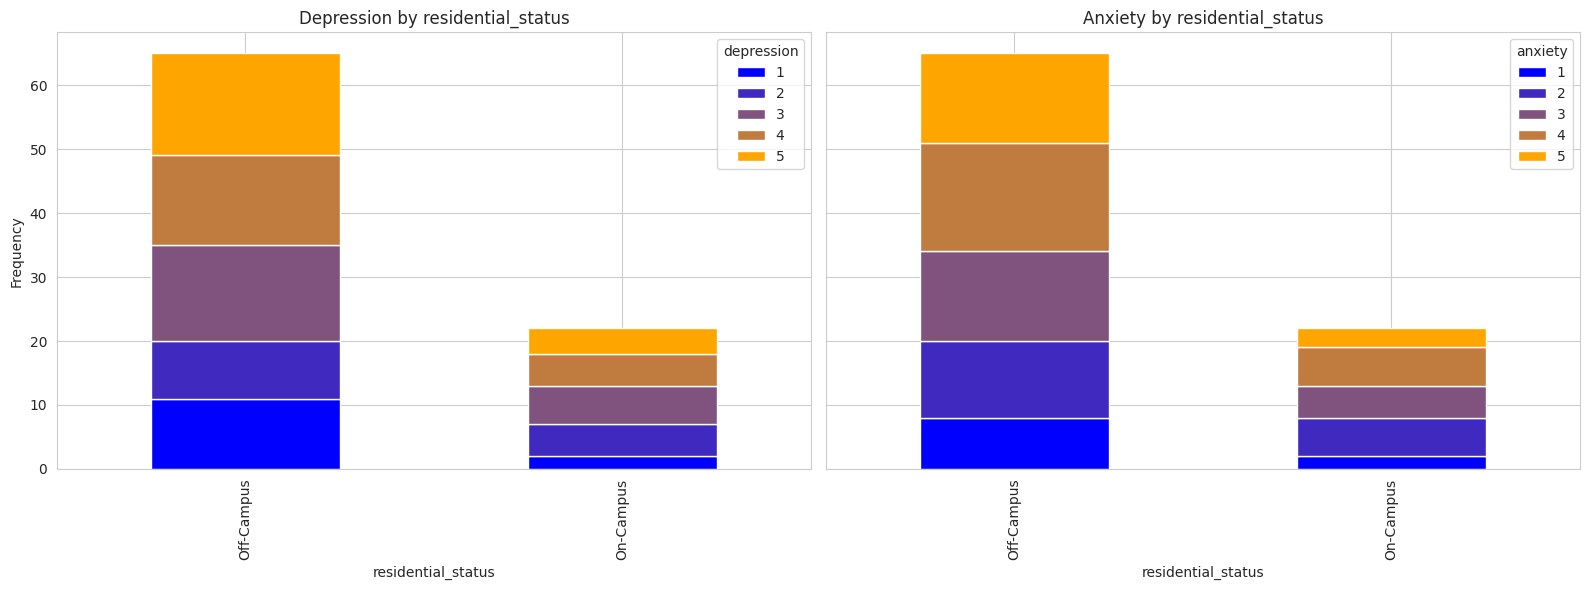

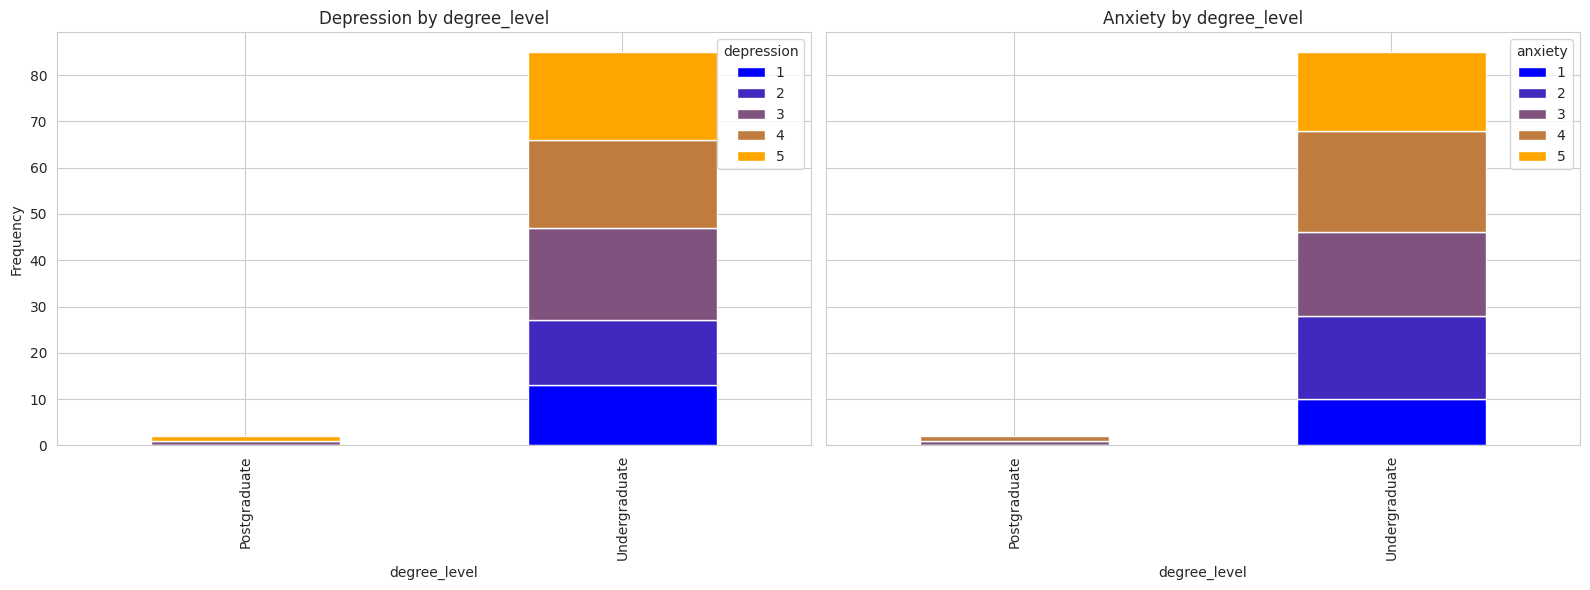

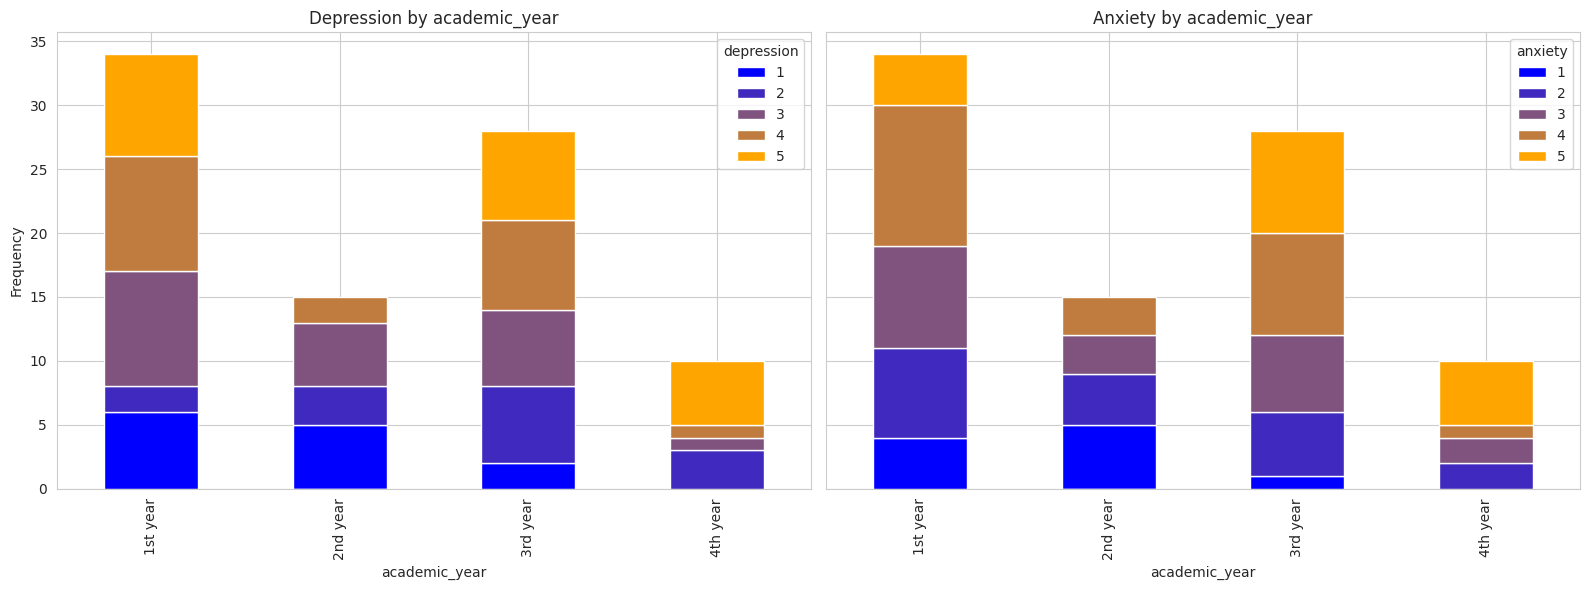

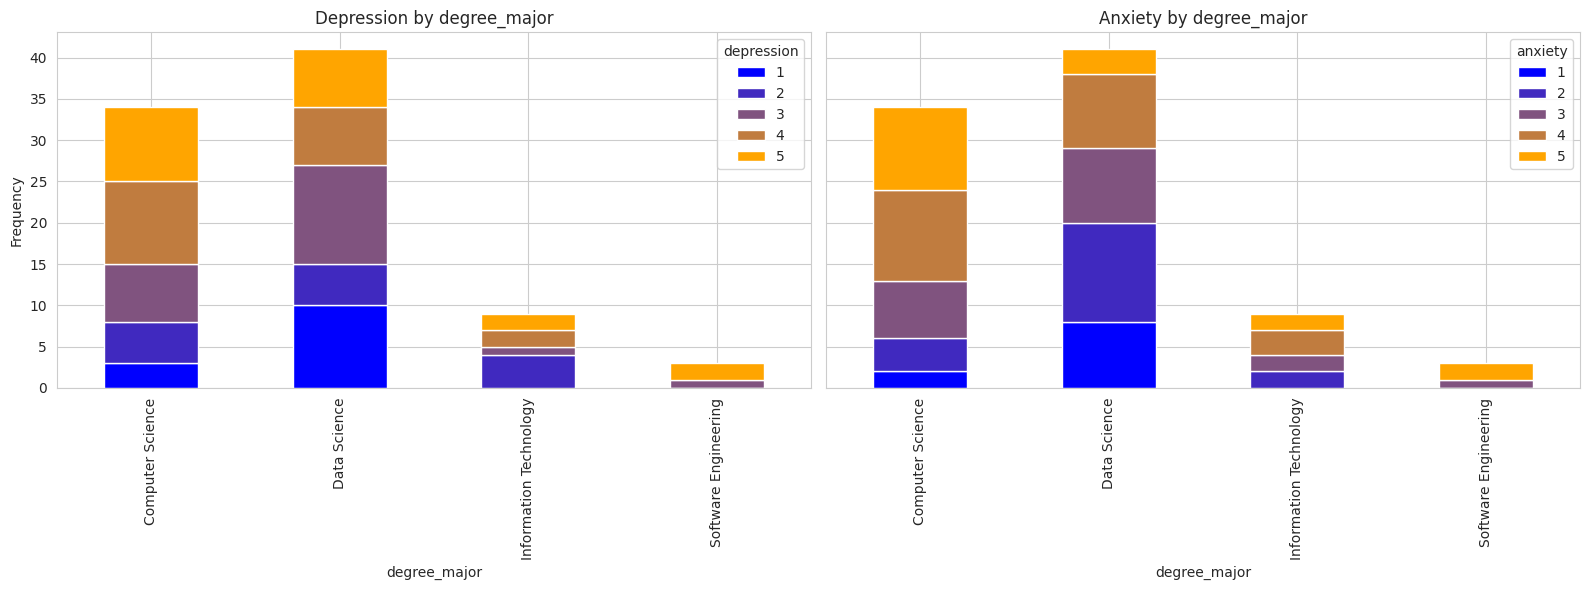

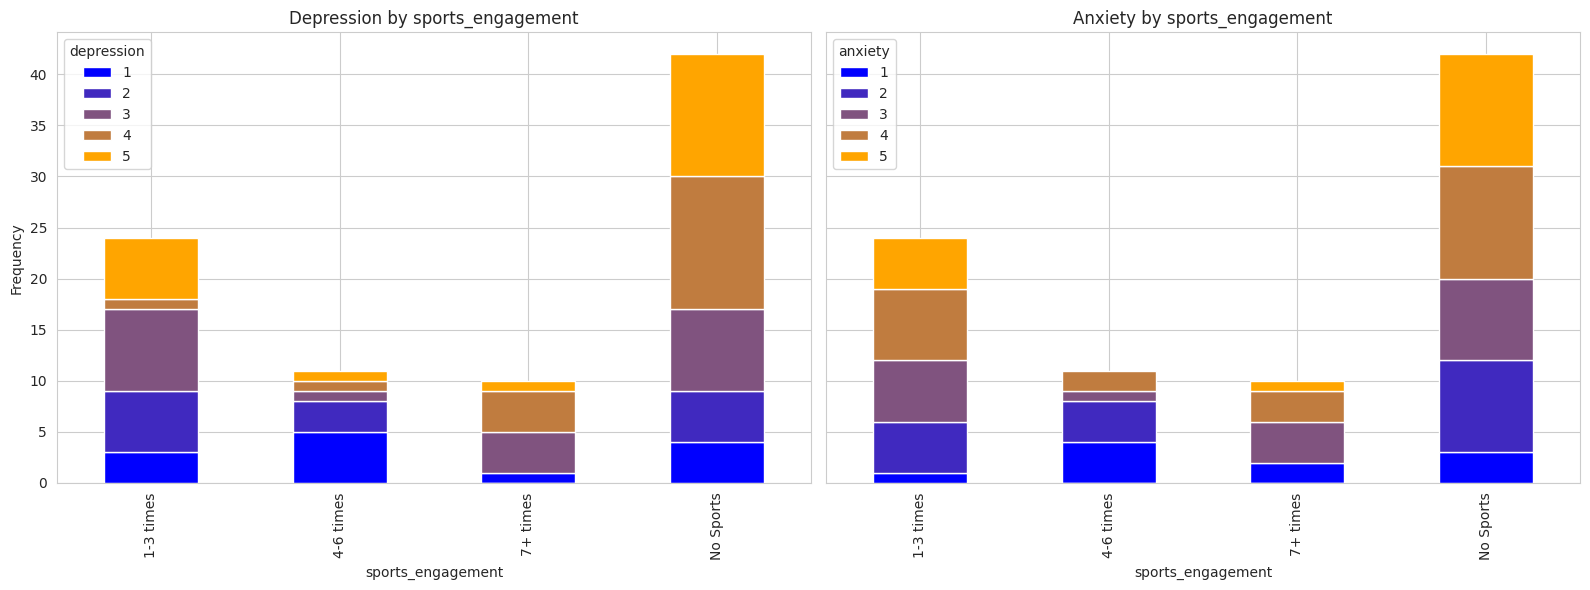

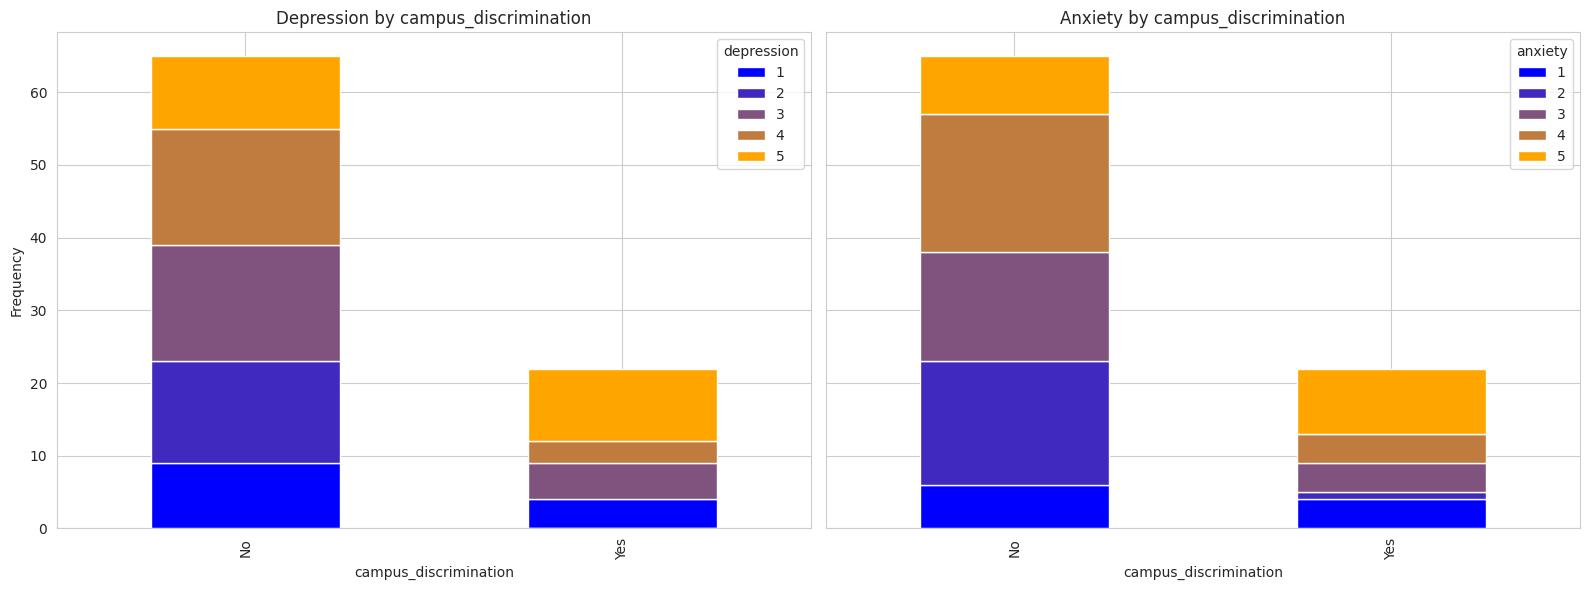

In [118]:
bi_palette = ["blue", "orange"]
cmap = LinearSegmentedColormap.from_list("custom_cmap", bi_palette)

categorical_columns = ['university', 'residential_status', 'degree_level',
                       'academic_year', 'degree_major', 'sports_engagement', 'campus_discrimination']


for column in categorical_columns:
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6), sharey=True)

    pd.crosstab(mental_data[column], mental_data['depression']).plot(kind='bar', stacked=True, colormap=cmap, ax=ax1)
    ax1.set_title(f"Depression by {column}")
    ax1.set_xlabel(column)
    ax1.set_ylabel("Frequency")

    pd.crosstab(mental_data[column], mental_data['anxiety']).plot(kind='bar', stacked=True, colormap=cmap, ax=ax2)
    ax2.set_title(f"Anxiety by {column}")
    ax2.set_xlabel(column)

    plt.tight_layout()
    plt.show()

###How does academic pressure and financial_concerns affect anxiety and depression?

In [122]:
#Run OrderedModel
model = OrderedModel(mental_data['depression'],
                    mental_data[['academic_pressure', 'financial_concerns']],
                    distr='logit').fit()
print(model.summary())

                             OrderedModel Results                             
Dep. Variable:             depression   Log-Likelihood:                -128.72
Model:                   OrderedModel   AIC:                             269.4
Method:            Maximum Likelihood   BIC:                             284.2
Date:                Mon, 24 Mar 2025                                         
Time:                        16:44:24                                         
No. Observations:                  87                                         
Df Residuals:                      81                                         
Df Model:                           2                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
academic_pressure      0.4172      0.182      2.296      0.022       0.061       0.773
financial_concerns     0.337

/usr/local/lib/python3.11/dist-packages/statsmodels/base/optimizer.py:737: RuntimeWarning: Maximum number of iterations has been exceeded.
  retvals = optimize.fmin(f, start_params, args=fargs, xtol=xtol,
/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Comment:
* Hệ số (coef): 0.4172, Giá trị dương cho thấy khi academic_pressure tăng, mức độ depression cũng có xu hướng tăng.
* Mô hình hồi quy ordinal cho thấy áp lực học tập (academic_pressure) và lo ngại tài chính (financial_concerns) đều có ảnh hưởng đáng kể đến mức độ trầm cảm (depression) ở sinh viên. Hệ số của academic_pressure là 0.4172 (p = 0.022) và của financial_concerns là 0.3373 (p = 0.012), cả hai đều có ý nghĩa thống kê ở mức p < 0.05.


In [121]:
#Run OrderedModel
model = OrderedModel(mental_data['anxiety'],
                    mental_data[['academic_pressure', 'financial_concerns']],
                    distr='logit').fit()
print(model.summary())

Optimization terminated successfully.
         Current function value: 1.487445
         Iterations: 400
         Function evaluations: 630
                             OrderedModel Results                             
Dep. Variable:                anxiety   Log-Likelihood:                -129.41
Model:                   OrderedModel   AIC:                             270.8
Method:            Maximum Likelihood   BIC:                             285.6
Date:                Mon, 24 Mar 2025                                         
Time:                        16:43:39                                         
No. Observations:                  87                                         
Df Residuals:                      81                                         
Df Model:                           2                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------

Comment:
* Hệ số (coef): 0.4172, Giá trị dương cho thấy khi academic_pressure tăng, mức độ anxiety cũng có xu hướng tăng.
* Mô hình hồi quy ordinal cho thấy áp lực học tập (academic_pressure) và lo ngại tài chính (financial_concerns) đều có ảnh hưởng đáng kể đến mức độ lo âu (anxiety) ở sinh viên. Hệ số của academic_pressure là 0.5164 (p = 0.005) và của financial_concerns là 0.3544 (p = 0.010), cả hai đều có ý nghĩa thống kê ở mức p < 0.05.

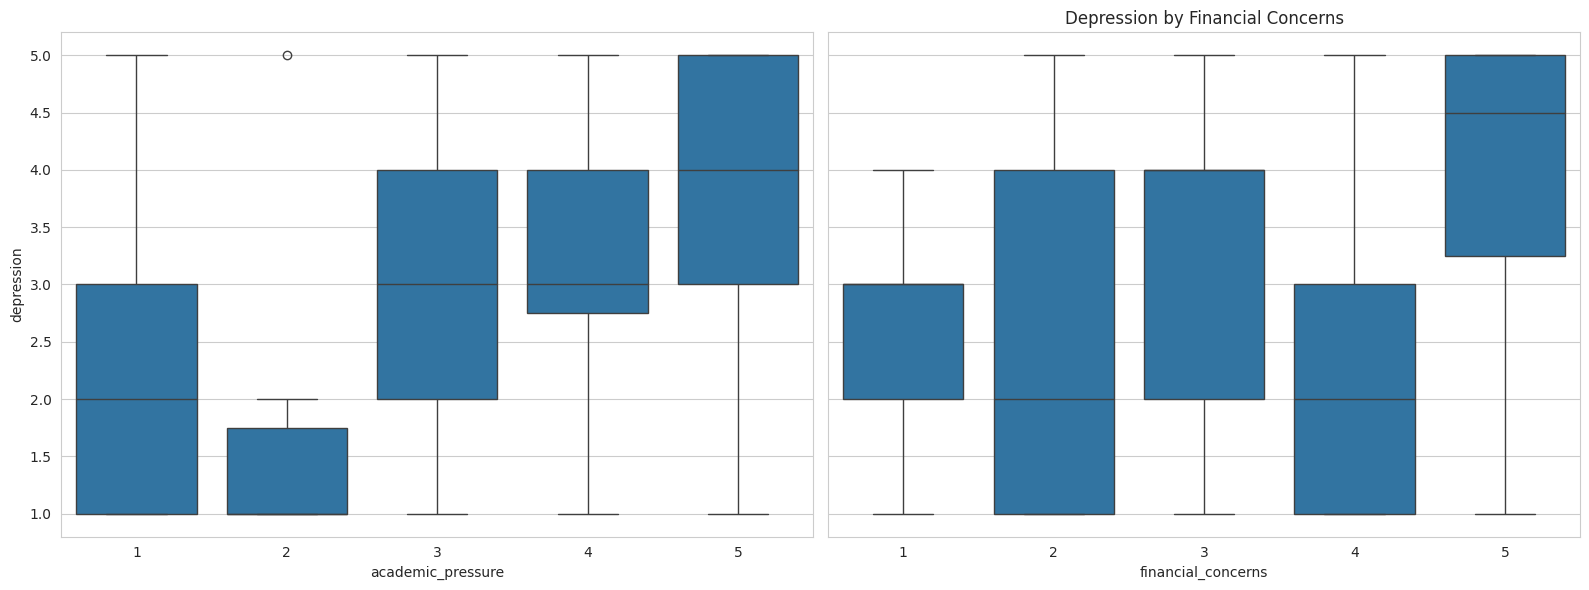

In [140]:
# Chart display for depression
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6), sharey=True)
sns.boxplot(x='academic_pressure', y='depression', data=mental_data, ax=ax1)
plt.title('Depression by Academic Pressure')
sns.boxplot(x='financial_concerns', y='depression', data=mental_data, ax=ax2)
plt.title('Depression by Financial Concerns')
plt.tight_layout()
plt.show()

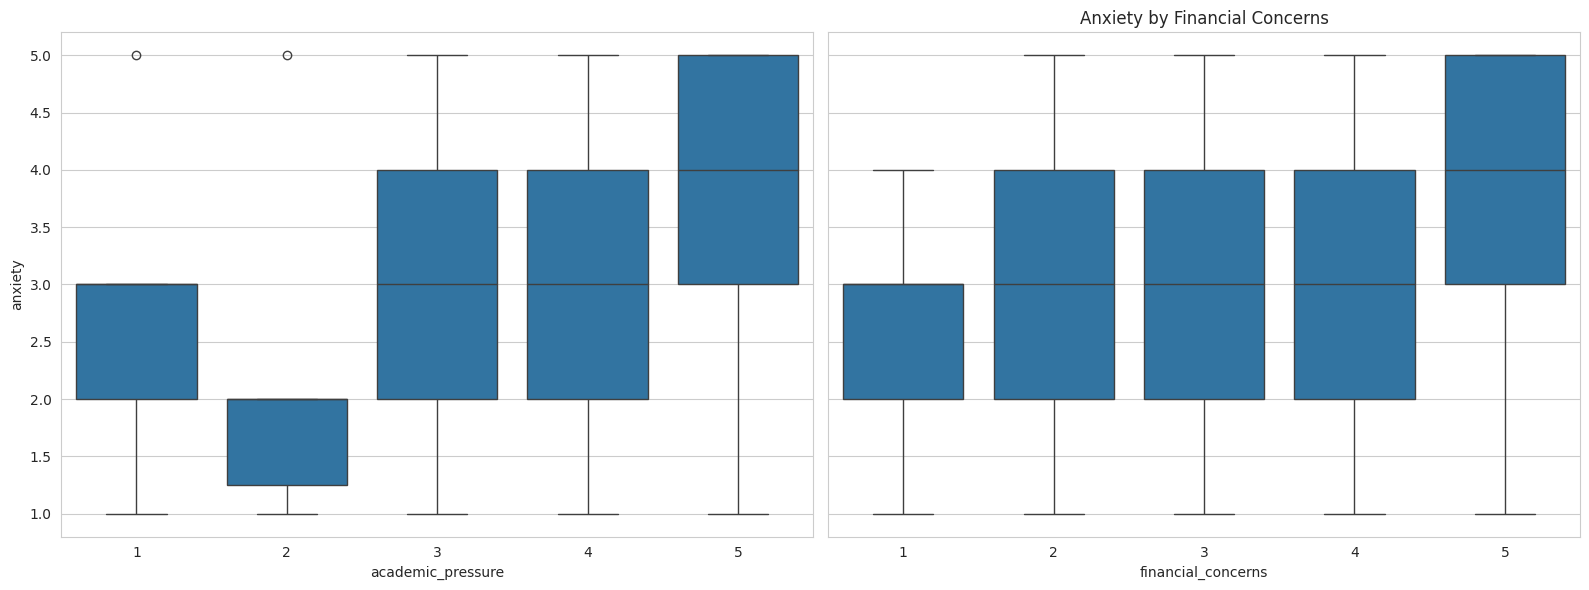

In [141]:
# Chart display for anxiety
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6), sharey=True)
sns.boxplot(x='academic_pressure', y='anxiety', data=mental_data, ax=ax1)
plt.title('Anxiety by Academic Pressure')
sns.boxplot(x='financial_concerns', y='anxiety', data=mental_data, ax=ax2)
plt.title('Anxiety by Financial Concerns')
plt.tight_layout()
plt.show()

**Comment:**
* Áp lực học tập là một trong những yếu tố chính góp phần làm gia tăng mức độ lo âu và trầm cảm ở sinh viên. Cụ thể, sinh viên chịu áp lực học tập cao (4-5 trên thang đo) có nguy cơ trải qua lo âu và trầm cảm ở mức cao hơn đáng kể so với những sinh viên có áp lực thấp, điều này có thể xuất phát từ khối lượng học tập lớn, thời gian biểu dày đặc, hoặc áp lực từ kỳ vọng học thuật.
* Bên cạnh đó, lo ngại tài chính cũng được xác định là một yếu tố quan trọng ảnh hưởng đến sức khỏe tinh thần, với tác động gần tương đương áp lực học tập. Điều này có thể phản ánh thực tế rằng nhiều sinh viên trong mẫu phụ thuộc vào hỗ trợ tài chính từ gia đình hoặc học bổng, khiến họ dễ bị ảnh hưởng bởi các vấn đề tài chính, từ đó làm tăng cảm giác bất an và căng thẳng.

**Recommend:**
* **Giảm áp lực học tập**: Các trường đại học nên xem xét điều chỉnh thời gian biểu học tập để linh hoạt hơn, đảm bảo sinh viên có đủ thời gian nghỉ ngơi và cân bằng giữa học tập và cuộc sống. Ngoài ra, việc tổ chức các buổi tư vấn học thuật hoặc hội thảo quản lý căng thẳng có thể giúp sinh viên đối phó tốt hơn với áp lực học tập, từ đó giảm nguy cơ lo âu và trầm cảm.
* **Hỗ trợ tài chính**: Tăng cường các chương trình hỗ trợ tài chính như học bổng, trợ cấp, hoặc các khoản vay ưu đãi để giảm bớt lo ngại tài chính cho sinh viên. Điều này không chỉ giúp giảm căng thẳng liên quan đến tài chính mà còn góp phần cải thiện sức khỏe tinh thần tổng thể, giảm mức độ lo âu và trầm cảm.

#4. Hypothetical Scenario

**Context**

Giả sử một trường đại học có 500 sinh viên ngành Khoa học Dữ liệu và Khoa học Máy tính, với đặc điểm tương tự như mẫu dữ liệu của bạn (87 sinh viên, thang đo 1-5 cho các biến như academic_pressure, financial_concerns, depression, anxiety). Dựa trên các phát hiện:

Áp lực học tập và lo ngại tài chính là hai yếu tố chính làm tăng depression và anxiety.
Mô hình hồi quy ordinal cho thấy:
Đối với depression: academic_pressure (coef = 0.4172, p = 0.022), financial_concerns (coef = 0.3373, p = 0.012).
Đối với anxiety: academic_pressure (coef = 0.5164, p = 0.005), financial_concerns (coef = 0.3544, p = 0.010).


**Hypothesis**

Nếu trường đại học thực hiện các biện pháp để:

Giảm áp lực học tập (giảm trung bình academic_pressure từ 4.0 xuống 3.0).
Tăng hỗ trợ tài chính (giảm trung bình financial_concerns từ 3.5 xuống 2.5),
thì mức độ depression và anxiety của sinh viên sẽ giảm đáng kể.

**Simulation**

**Giảm áp lực học tập:**

- Giảm academic_pressure từ 4.0 xuống 3.0 (giảm 1 điểm):
  - Ảnh hưởng đến depression: giảm 0.4172 điểm (dựa trên coef = 0.4172).
  - Ảnh hưởng đến anxiety: giảm 0.5164 điểm (dựa trên coef = 0.5164).

**Giảm lo ngại tài chính:**

- Giảm financial_concerns từ 3.5 xuống 2.5 (giảm 1 điểm):
  - Ảnh hưởng đến depression: giảm 0.3373 điểm (dựa trên coef = 0.3373).
  - Ảnh hưởng đến anxiety: giảm 0.3544 điểm (dựa trên coef = 0.3544).

**Tổng tác động:**

- depression: Giảm khoảng 0.4172 + 0.3373 = 0.7545 điểm.
- anxiety: Giảm khoảng 0.5164 + 0.3544 = 0.8708 điểm.

**Kết quả dự kiến:**

- Giả sử trung bình hiện tại của depression là 3.5 và anxiety là 3.8 (dựa trên dữ liệu) sau can thiệp:
  - depression giảm xuống khoảng 3.5 - 0.7545 = 2.75 (xấp xỉ mức 3 - "Moderate").
  - anxiety giảm xuống khoảng 3.8 - 0.8708 = 2.93 (xấp xỉ mức 3 - "Moderate").
- Tỷ lệ sinh viên báo cáo depression và anxiety ở mức cao (4-5) có thể giảm từ 40% xuống 20%.

###Comparison of Depression and Anxiety Before and After Intervention

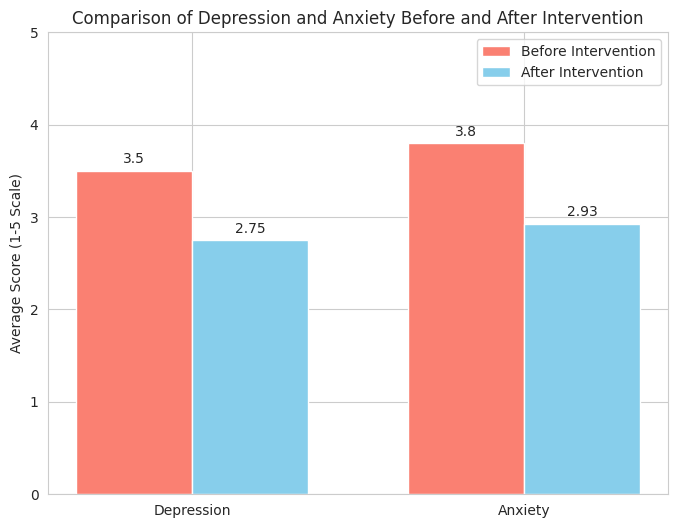

In [142]:
metrics = ['Depression', 'Anxiety']
before_intervention = [3.5, 3.8]    #Average
after_intervention = [2.75, 2.93]   #Average

x = np.arange(len(metrics))
width = 0.35

fig, ax = plt.subplots(figsize=(8, 6))
bars1 = ax.bar(x - width/2, before_intervention, width, label='Before Intervention', color='salmon')
bars2 = ax.bar(x + width/2, after_intervention, width, label='After Intervention', color='skyblue')

ax.set_ylabel('Average Score (1-5 Scale)')
ax.set_title('Comparison of Depression and Anxiety Before and After Intervention')
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.legend()

for bar in bars1:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval + 0.05, round(yval, 2), ha='center', va='bottom')
for bar in bars2:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval + 0.05, round(yval, 2), ha='center', va='bottom')

plt.ylim(0, 5)
plt.show()

#5. Conclusion and Recommendation

**Final conclusion**

Phân tích cho thấy áp lực học tập và lo ngại tài chính là hai yếu tố chính làm gia tăng lo âu và trầm cảm ở sinh viên, với áp lực học tập có tác động mạnh hơn đến lo âu (coef = 0.5164, p = 0.005). Mô phỏng can thiệp cho thấy việc giảm áp lực học tập và lo ngại tài chính (mỗi yếu tố giảm 1 điểm) có thể giảm mức độ lo âu và trầm cảm từ 'High' (3.5-3.8) xuống 'Moderate' (2.75-2.93), đồng thời giảm tỷ lệ sinh viên báo cáo lo âu và trầm cảm ở mức cao từ 40% xuống 20%.

**Recommendation**
Để cải thiện sức khỏe tinh thần của sinh viên, các trường đại học nên:
- (1) Giảm áp lực học tập bằng cách điều chỉnh lịch trình học tập linh hoạt, tổ chức tư vấn học thuật, và cung cấp hội thảo quản lý căng thẳng.
- (2) Tăng hỗ trợ tài chính thông qua học bổng, trợ cấp dựa trên thành tích học tập hoặc hoàn cảnh gia đình, đồng thời cung cấp các khoản trợ cấp nhỏ cho sinh viên có khó khăn tài chính.
- (3) Hợp tác với các tổ chức tài chính để cung cấp các khoản vay không lãi suất hoặc lãi suất thấp cho sinh viên, giúp họ trang trải chi phí học tập và sinh hoạt.
- (4) Tổ chức các buổi tư vấn tài chính để hướng dẫn sinh viên cách quản lý ngân sách, tìm kiếm hỗ trợ tài chính, hoặc làm việc bán thời gian phù hợp với lịch học
- (5) Dịch vụ tư vấn tâm lý miễn phí: Thiết lập hoặc mở rộng các trung tâm tư vấn tâm lý trong khuôn viên trường, cung cấp dịch vụ miễn phí hoặc chi phí thấp để sinh viên có thể dễ dàng tiếp cận khi cảm thấy lo âu hoặc trầm cảm do áp lực học tập và tài chính
- (6) Thực hiện khảo sát định kỳ và thu thập phản hồi để giám sát hiệu quả của các can thiệp. Các biện pháp này có thể giảm mức độ lo âu và trầm cảm từ 'High' (3.5-3.8) xuống 'Moderate' (2.75-2.93), như minh họa trong biểu đồ so sánh trước và sau can thiệp.